## Timeseries Explorer

Achievements now have completion dates for each user and a tally of how many achievements each player completed for every month from Jan 2010 to may 2020.

## Set up timeseries dataframe
Arrange the data so that rows = date, columns = achievements per month, index = player_realm

In [347]:
import os
import pandas as pd
import datetime
import config
from IPython.display import HTML

file_in = os.path.join(config.clean_dir, 'timed_player_stats_subset.csv')
df = pd.read_csv(file_in)
extra_cols = ['Unnamed: 0', 'Unnamed: 0.1', 'level', 'guild_rank', 'realm_id','playable_race',
              'playable_class','faction', 'guild_name','completed_quests','honor_level',
              'mounts_collected','pets_collected','total_achievement_points',
              'total_achievements']
keep_cols = [col for col in df.columns.values if col not in extra_cols]
df.head()

,Unnamed: 0,Unnamed: 0.1,level,guild_rank,player,id,realm,realm_id,playable_race,playable_class,...,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2020-05
0,0,0,120.0,130239681.0,captnubcakes,captnubcakes_nazjatar,nazjatar,1131.0,1.0,8.0,...,18.0,20.0,20.0,24.0,18.0,33.0,11.0,14.0,39.0,56.0
1,1,1,120.0,130240218.0,dragonballz,dragonballz_nazjatar,nazjatar,1131.0,1.0,5.0,...,17.0,22.0,21.0,22.0,29.0,45.0,9.0,12.0,29.0,56.0
2,2,2,110.0,130243287.0,redrence,redrence_nazjatar,nazjatar,1131.0,22.0,1.0,...,18.0,19.0,18.0,24.0,17.0,34.0,11.0,14.0,37.0,83.0
3,3,3,120.0,130259309.0,moonfury,moonfury_nazjatar,nazjatar,1131.0,4.0,1.0,...,33.0,33.0,33.0,7.0,8.0,15.0,4.0,31.0,31.0,61.0
4,4,4,120.0,130266216.0,questaria,questaria_nazjatar,nazjatar,1131.0,1.0,8.0,...,24.0,26.0,26.0,8.0,19.0,15.0,2.0,20.0,26.0,57.0


In [348]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,level,guild_rank,realm_id,playable_race,playable_class,completed_quests,honor_level,mounts_collected,...,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2020-05
count,809.000000,809.000000,809.000000,8.090000e+02,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,...,809.000000,803.000000,806.000000,808.000000,809.000000,809.000000,809.00000,809.000000,809.000000,809.000000
mean,32.976514,32.976514,117.844252,1.522932e+08,493.029666,11.291718,6.416564,1881.990111,25.882571,215.630408,...,30.772559,26.418431,25.586849,19.324257,29.585909,32.055624,26.89246,27.996292,28.119901,55.346106
std,22.886844,22.886844,4.549831,5.063513e+07,1045.625087,11.558673,3.563188,2103.219779,41.734039,139.363273,...,20.449350,20.682356,19.603442,15.721517,20.298036,19.664529,19.64473,17.728040,18.915503,38.079338
min,0.000000,0.000000,100.000000,1.743889e+06,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.00000,4.000000,1.000000,10.000000
25%,13.000000,13.000000,120.000000,1.310563e+08,16.000000,3.000000,3.000000,268.000000,4.000000,116.000000,...,16.000000,11.000000,11.000000,8.000000,14.000000,19.000000,15.00000,17.000000,15.000000,30.000000
50%,30.000000,30.000000,120.000000,1.677935e+08,76.000000,5.000000,6.000000,1128.000000,11.000000,191.000000,...,26.000000,22.000000,21.000000,15.000000,25.000000,28.000000,21.00000,25.000000,24.000000,46.000000
75%,49.000000,49.000000,120.000000,1.830036e+08,98.000000,22.000000,10.000000,2876.000000,29.000000,289.000000,...,42.000000,38.000000,37.000000,26.000000,40.000000,40.000000,33.00000,34.000000,37.000000,68.000000
max,92.000000,92.000000,120.000000,2.111899e+08,3734.000000,37.000000,12.000000,10616.000000,375.000000,686.000000,...,121.000000,118.000000,132.000000,118.000000,138.000000,178.000000,143.00000,213.000000,139.000000,352.000000


In [349]:
df_time = df[keep_cols].transpose()
df_time.columns = df.id
df_time = df_time.iloc[3:][:]
#display(HTML(df_time.to_html()))
df_time.head()

id,captnubcakes_nazjatar,dragonballz_nazjatar,redrence_nazjatar,moonfury_nazjatar,questaria_nazjatar,carniverous_nazjatar,carniveris_nazjatar,caemlyn_nazjatar,ctuchik_nazjatar,satisfaktion_nazjatar,...,fîona_kelthuzad,kbrew_kelthuzad,âchillys_kelthuzad,xiyo_kelthuzad,andruil_kelthuzad,thalous_kelthuzad,quinniel_kelthuzad,ryaeth_kelthuzad,sodapopout_kelthuzad,tnaps_kelthuzad
2010-01,17,18,18,13,46,64,45,43,32,23,...,13,13,12,12,12,20,15,27,9,21
2011-01,59,31,42,39,22,32,18,11,27,27,...,63,24,22,22,22,26,40,43,19,17
2012-01,47,15,11,7,11,13,18,14,13,14,...,16,141,92,139,73,12,7,5,2,2
2013-01,28,25,26,18,16,15,15,15,15,23,...,14,26,22,26,23,23,19,39,22,20
2014-01,31,31,31,15,13,11,11,11,11,23,...,27,48,37,46,34,21,27,73,53,52


## Achievements per date

In [319]:
import config
import pandas as pd
import numpy as np
import os
import datetime
import glob


dir_clean = config.clean_dir
dir_processed = config.processed_dir
dir_raw = config.raw_dir
file_in = os.path.join(dir_clean, 'time_formatted', '*{}')

# Read in player stats and achievements to dataframes
count = 0
for f in glob.glob(file_in.format('csv')):
    print(f)
    df_ps_cat = pd.read_csv(f)
    # df_ps_cat = df_ps_cat.set_index('id')

    base_cols = ['level', 'guild_rank', 'player', 'id', 'realm', 'realm_id',
                 'playable_race', 'playable_class', 'faction', 'guild_name', 'completed_quests',
                 'honor_level', 'mounts_collected', 'pets_collected', 'total_achievement_points',
                 'total_achievements']
    months = np.arange(1,13)
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
    timepoints = []

    for month in months:
        if month < 10:
            month = str(0)+str(month)
        for year in years:
            if year == 2020 and month == '05':
                break
            else:
                month = str(month)
                timepoints.append(str(year) + '-' + str(month))


    df_date = pd.DataFrame(columns=base_cols + timepoints)
    i = 0
    for index, row in df_ps_cat.iterrows():
        #print(i, end=' ')
        t = pd.DataFrame(row.transpose())
        t = t.reset_index()
        print(t)
        t.columns = ['ach', 'date']
        tg = t.groupby('date').count()
        rows = [rows for rows in tg.index.values if '-' in str(rows) and '20' in str(rows)]
        tg = tg.loc[rows]
        tg = tg.transpose()
        for col in base_cols:
            df_date.at[index, col] = row[col]
        for col in tg.columns.values:
            df_date.at[index, col] = tg[col][0]
        i = i + 1

    cols = []
    for col in df_date.columns.values:
        cols.append(col.replace(' ', '-'))
    df_date.columns = cols
    df_date.to_csv(os.path.join(dir_clean, 'time_tallied', f.split('time_formatted/')[1].replace('utc', 'datetime')))
    count = count + 1




/Users/haleyspeed/Docs/insight/git/data/cleaned/time_formatted/wow_achievement_dates_13000_4400_utc.csv
                         index            0
0                   Unnamed: 0            0
1                   10000_date      2015-07
2                   10001_date      2015-07
3                   10010_date      2015-06
4                   10011_date      2015-06
...                        ...          ...
4715                    player   beastlette
4716                     realm  eldrethalas
4717                  realm_id          123
4718  total_achievement_points        32735
4719        total_achievements         3749

[4720 rows x 2 columns]
                         index            1
0                   Unnamed: 0            1
1                   10000_date      2015-07
2                   10001_date      2015-07
3                   10010_date      2015-06
4                   10011_date      2015-06
...                        ...          ...
4715                    player     

                         index          0
0                   Unnamed: 0          0
1                   10000_date    2015-07
2                   10001_date    2015-07
3                   10010_date    2019-01
4                   10011_date    2017-03
...                        ...        ...
4783                    player  melloween
4784                     realm  stormrage
4785                  realm_id         60
4786  total_achievement_points       8220
4787        total_achievements        878

[4788 rows x 2 columns]
                         index           1
0                   Unnamed: 0           1
1                   10000_date     2015-07
2                   10001_date     2015-07
3                   10010_date     2019-01
4                   10011_date     2017-03
...                        ...         ...
4783                    player  chrisallie
4784                     realm   stormrage
4785                  realm_id          60
4786  total_achievement_points        100

                         index          21
0                   Unnamed: 0          21
1                   10000_date     2015-07
2                   10001_date     2015-07
3                   10010_date     2015-11
4                   10011_date     2015-11
...                        ...         ...
4783                    player  targoviste
4784                     realm   stormrage
4785                  realm_id          60
4786  total_achievement_points       10140
4787        total_achievements        1136

[4788 rows x 2 columns]
                         index           22
0                   Unnamed: 0           22
1                   10000_date      2015-07
2                   10001_date      2015-07
3                   10010_date      2020-04
4                   10011_date      2020-04
...                        ...          ...
4783                    player  monkultiran
4784                     realm    stormrage
4785                  realm_id           60
4786  total_achieve

                         index           9
0                   Unnamed: 0           9
1                   10001_date     2015-07
2                   10010_date     2016-01
3                   10011_date     2020-05
4                   10012_date     2017-05
...                        ...         ...
4689                    player   kasmonkas
4690                     realm  thaurissan
4691                  realm_id        3724
4692  total_achievement_points       10230
4693        total_achievements        1148

[4694 rows x 2 columns]
                         index          10
0                   Unnamed: 0          10
1                   10001_date     2015-07
2                   10010_date     2015-06
3                   10011_date     2015-06
4                   10012_date     2017-03
...                        ...         ...
4689                    player  woeibourne
4690                     realm  thaurissan
4691                  realm_id        3724
4692  total_achievement_point

                         index            31
0                   Unnamed: 0            31
1                   10001_date       2015-07
2                   10010_date       2015-06
3                   10011_date       2019-01
4                   10012_date       2015-11
...                        ...           ...
4689                    player  carrotflower
4690                     realm    thaurissan
4691                  realm_id          3724
4692  total_achievement_points         23260
4693        total_achievements          2642

[4694 rows x 2 columns]
                         index          32
0                   Unnamed: 0          32
1                   10001_date     2015-07
2                   10010_date     2015-06
3                   10011_date     2019-01
4                   10012_date     2018-09
...                        ...         ...
4689                    player       chrrp
4690                     realm  thaurissan
4691                  realm_id        3724
4692 

                         index           0
0                   Unnamed: 0           0
1                   10000_date     2015-09
2                   10001_date     2015-09
3                   10010_date     2015-06
4                   10011_date     2015-06
...                        ...         ...
4761                    player    slamiced
4762                     realm  proudmoore
4763                  realm_id           5
4764  total_achievement_points       27830
4765        total_achievements        3219

[4766 rows x 2 columns]
                         index           1
0                   Unnamed: 0           1
1                   10000_date     2015-09
2                   10001_date     2015-09
3                   10010_date     2015-06
4                   10011_date     2015-06
...                        ...         ...
4761                    player      slewov
4762                     realm  proudmoore
4763                  realm_id           5
4764  total_achievement_point

                         index        0
0                   Unnamed: 0        0
1                   10000_date  2015-12
2                   10001_date  2015-12
3                   10010_date  2015-10
4                   10011_date  2015-10
...                        ...      ...
4750  total_achievement_points    15085
4751        total_achievements     1706
4752                11000_date      NaN
4753                11013_date      NaN
4754                13200_date      NaN

[4755 rows x 2 columns]
                         index        1
0                   Unnamed: 0        1
1                   10000_date  2015-12
2                   10001_date  2015-12
3                   10010_date  2016-06
4                   10011_date  2016-07
...                        ...      ...
4750  total_achievement_points    12845
4751        total_achievements     1436
4752                11000_date      NaN
4753                11013_date      NaN
4754                13200_date      NaN

[4755 rows x 2

                         index       18
0                   Unnamed: 0       18
1                   10000_date  2015-12
2                   10001_date  2015-12
3                   10010_date  2015-06
4                   10011_date  2015-06
...                        ...      ...
4750  total_achievement_points    13260
4751        total_achievements     1462
4752                11000_date      NaN
4753                11013_date      NaN
4754                13200_date      NaN

[4755 rows x 2 columns]
                         index       19
0                   Unnamed: 0       19
1                   10000_date  2015-12
2                   10001_date  2015-12
3                   10010_date  2016-01
4                   10011_date  2016-01
...                        ...      ...
4750  total_achievement_points     4595
4751        total_achievements      524
4752                11000_date      NaN
4753                11013_date      NaN
4754                13200_date      NaN

[4755 rows x 2

                         index       38
0                   Unnamed: 0       38
1                   10000_date  2015-12
2                   10001_date  2015-12
3                   10010_date  2015-06
4                   10011_date  2015-06
...                        ...      ...
4750  total_achievement_points    10375
4751        total_achievements     1169
4752                11000_date  2017-04
4753                11013_date  2017-04
4754                13200_date  2019-07

[4755 rows x 2 columns]
                         index       39
0                   Unnamed: 0       39
1                   10000_date  2015-12
2                   10001_date  2015-12
3                   10010_date  2016-05
4                   10011_date  2016-05
...                        ...      ...
4750  total_achievement_points    13920
4751        total_achievements     1593
4752                11000_date  2017-04
4753                11013_date  2017-04
4754                13200_date  2019-07

[4755 rows x 2

                         index         19
0                   Unnamed: 0         19
1                   10010_date    2015-07
2                   10011_date    2016-05
3                   10012_date    2015-08
4                   10013_date    2015-06
...                        ...        ...
4545                    player  archilith
4546                     realm  stormrage
4547                  realm_id         60
4548  total_achievement_points      21610
4549        total_achievements       2426

[4550 rows x 2 columns]
                         index         20
0                   Unnamed: 0         20
1                   10010_date    2015-08
2                   10011_date    2018-10
3                   10012_date    2019-12
4                   10013_date    2015-10
...                        ...        ...
4545                    player    volkano
4546                     realm  stormrage
4547                  realm_id         60
4548  total_achievement_points      19965
4549     

                         index         38
0                   Unnamed: 0         38
1                   10010_date    2015-06
2                   10011_date    2015-06
3                   10012_date    2015-11
4                   10013_date    2015-06
...                        ...        ...
4545                    player  snacktard
4546                     realm  stormrage
4547                  realm_id         60
4548  total_achievement_points      16165
4549        total_achievements       1831

[4550 rows x 2 columns]
                         index         39
0                   Unnamed: 0         39
1                   10010_date    2015-06
2                   10011_date    2016-01
3                   10012_date    2016-12
4                   10013_date    2016-12
...                        ...        ...
4545                    player   ällmight
4546                     realm  stormrage
4547                  realm_id         60
4548  total_achievement_points      17610
4549     

                         index           57
0                   Unnamed: 0           57
1                   10010_date      2015-06
2                   10011_date      2015-06
3                   10012_date      2018-12
4                   10013_date      2018-12
...                        ...          ...
4545                    player  romprchompr
4546                     realm    stormrage
4547                  realm_id           60
4548  total_achievement_points        13005
4549        total_achievements         1415

[4550 rows x 2 columns]
                         index           58
0                   Unnamed: 0           58
1                   10010_date      2015-06
2                   10011_date      2019-05
3                   10012_date      2018-12
4                   10013_date      2015-10
...                        ...          ...
4545                    player  monissalina
4546                     realm    stormrage
4547                  realm_id           60
4548  t

/Users/haleyspeed/Docs/insight/git/data/cleaned/time_formatted/wow_achievement_dates_6000_3800_utc.csv
                         index            0
0                   Unnamed: 0            0
1                   10000_date      2015-07
2                   10001_date      2015-07
3                   10010_date      2015-06
4                   10011_date      2015-06
...                        ...          ...
4596                    player     julindra
4597                     realm  silver-hand
4598                  realm_id           12
4599  total_achievement_points        15040
4600        total_achievements         1704

[4601 rows x 2 columns]
                         index            1
0                   Unnamed: 0            1
1                   10000_date      2015-07
2                   10001_date      2015-07
3                   10010_date      2015-06
4                   10011_date      2015-06
...                        ...          ...
4596                    player      

                         index           19
0                   Unnamed: 0           19
1                   10000_date      2015-07
2                   10001_date      2015-07
3                   10010_date      2015-12
4                   10011_date      2015-07
...                        ...          ...
4596                    player   kentravyon
4597                     realm  silver-hand
4598                  realm_id           12
4599  total_achievement_points        17965
4600        total_achievements         2012

[4601 rows x 2 columns]
                         index           20
0                   Unnamed: 0           20
1                   10000_date      2015-07
2                   10001_date      2015-07
3                   10010_date      2019-01
4                   10011_date      2015-07
...                        ...          ...
4596                    player      carella
4597                     realm  silver-hand
4598                  realm_id           12
4599  t

                         index       10
0                   Unnamed: 0       10
1                   10010_date  2015-06
2                   10011_date  2015-06
3                   10012_date  2015-11
4                   10013_date  2015-07
...                        ...      ...
4254                  realm_id       76
4255  total_achievement_points    25920
4256        total_achievements     2931
4257                13202_date      NaN
4258                13212_date      NaN

[4259 rows x 2 columns]
                         index       11
0                   Unnamed: 0       11
1                   10010_date  2015-06
2                   10011_date  2015-06
3                   10012_date  2015-11
4                   10013_date  2015-07
...                        ...      ...
4254                  realm_id       76
4255  total_achievement_points    28520
4256        total_achievements     3313
4257                13202_date      NaN
4258                13212_date      NaN

[4259 rows x 2

KeyboardInterrupt: 

In [368]:
#dft = df_time.reset_index()
#dft.columns = ['x'] + dft.columns[:]
for index, row in dft.iterrows():
    dft.at[index,'index'] = datetime.datetime.strptime(row['index'], '%Y-%m') 
dft = dft.set_index('index')
print(dft.columns.values)

['captnubcakes_nazjatar' 'dragonballz_nazjatar' 'redrence_nazjatar'
 'moonfury_nazjatar' 'questaria_nazjatar' 'carniverous_nazjatar'
 'carniveris_nazjatar' 'caemlyn_nazjatar' 'ctuchik_nazjatar'
 'satisfaktion_nazjatar' 'lazerpewpew_nazjatar' 'crazyknight_nazjatar'
 'roflcopterzz_nazjatar' 'funkymerkin_nazjatar' 'arishok_nazjatar'
 'halfpriest_nazjatar' 'senterr_nazjatar' 'darkurvar_proudmoore'
 'mcglamary_proudmoore' 'party_proudmoore' 'pools_proudmoore'
 'skuba_proudmoore' 'lorelael_proudmoore' 'bettarilde_proudmoore'
 'tratt_proudmoore' 'gaeder_proudmoore' 'rainfern_proudmoore'
 'alaatixa_proudmoore' 'daanie_proudmoore' 'moegalee_proudmoore'
 'mavira_proudmoore' 'danile_proudmoore' 'hailstorm_proudmoore'
 'rainoffire_proudmoore' 'yensid_proudmoore' 'tomuchtruble_proudmoore'
 'docstab_proudmoore' 'dadaronius_proudmoore' 'summersrain_proudmoore'
 'karjisan_proudmoore' 'deniell_proudmoore' 'mccoolluv_proudmoore'
 'waddafuc_proudmoore' 'thask_proudmoore' 'blodsrit_proudmoore'
 'iriá_prou

In [370]:
print(len(np.unique(dft.index.values)))

147


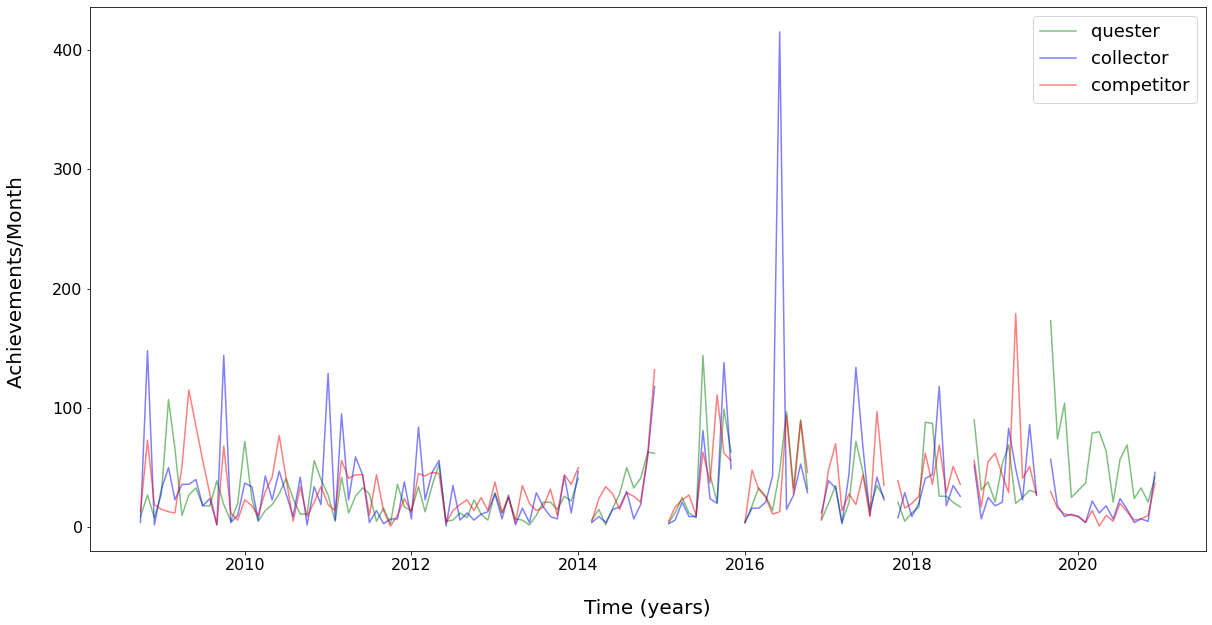

In [396]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 10))
a = ax.plot(sorted(dft.index.values),dft['aniimorpher_kelthuzad'], label = 'quester', ms = 4, color = 'green', alpha = 0.5)
a = ax.plot(sorted(dft.index.values),dft['maheisa_kelthuzad'], label = 'collector', ms = 4, color ='blue', alpha = 0.5)
a = ax.plot(sorted(dft.index.values),dft['vekalla_kelthuzad'], label = 'competitor', ms = 4, color ='red', alpha = 0.5)
a = ax.set_xlabel('\nTime (years)', fontsize = 20)
a = ax.set_ylabel('Achievements/Month \n', fontsize = 20)
a = ax.tick_params(labelsize = 16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 18)



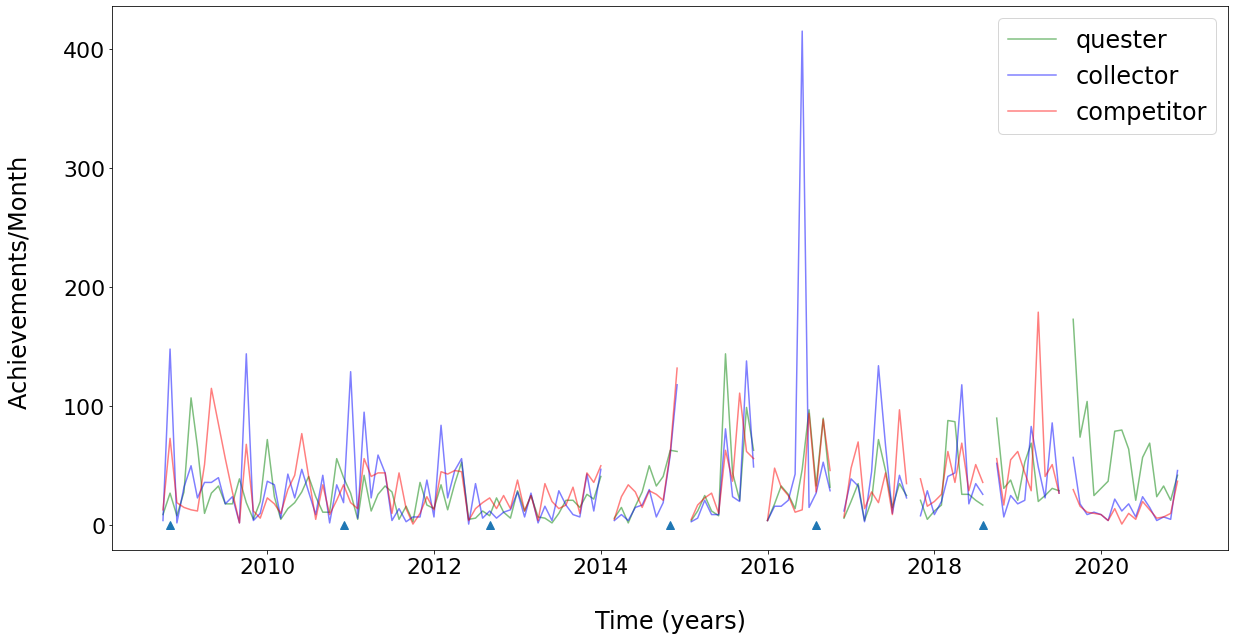

In [412]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.ticker as ticker

df_exp = pd.DataFrame()
df_exp['expansion'] = ['Wrath of the Lich King', 'Cataclysm', 'Mists of Pandaria', 
                      'Warlords of Draenor', 'Legion', 'Battle for Azeroth']
df_exp['release_date'] = ['2008-11', '2010-12', '2012-09', 
                      '2014-11', '2016-08', '2018-08']
df['release_date_formatted'] = ''
for index, row in df_exp.iterrows():
    df_exp.at[index,'release_date_formatted'] = datetime.datetime.strptime(row['release_date'], '%Y-%m')                

df_exp = df_exp.set_index('release_date_formatted')
    
fig, ax = plt.subplots(figsize=(20, 10))
a = ax.plot(sorted(dft.index.values),dft['aniimorpher_kelthuzad'], label = 'quester', ms = 6, color = 'green', alpha = 0.5)
a = ax.plot(sorted(dft.index.values),dft['maheisa_kelthuzad'], label = 'collector', ms = 6, color ='blue', alpha = 0.5)
a = ax.plot(sorted(dft.index.values),dft['vekalla_kelthuzad'], label = 'competitor', ms = 6, color ='red', alpha = 0.5)
a = ax.plot(sorted(df_exp.index.values), len(df_exp.index.values)*[0], ls = 'none', marker = '^', ms = 8)
a = ax.set_xlabel('\nTime (years)', fontsize = 24)
a = ax.set_ylabel('Achievements/Month \n', fontsize = 24)
a = ax.tick_params(labelsize = 22)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 24)

